In [3]:
import numpy as np
from numpy.linalg import*
import matplotlib.pyplot as plt
from numpy import r_, exp, cos, sin, pi, zeros, ones, hanning, sqrt, log, floor, reshape, mean
from scipy import signal
from numpy.fft import fft
import math
#%matplotlib inline

In [4]:
# Characteristic impedances
Z_0 = 75
Z_1 = 50
Z_2 = 1000
T_S = Z_0/(Z_0+Z_1)
G_S = (Z_1-Z_0)/(Z_1+Z_0)
G_R = (Z_2-Z_0)/(Z_2+Z_0)

tau = 2.37   # ns
z_r = -1     # z_r = z/l ->  -1 for z=-l, 0 for z=0

def v_s(t,delay):
    t_new = t-delay
    v_s = np.zeros_like(t_new)
    for k,tk in enumerate(t_new):
        if tk >= 1 and tk <= 2:
            v_s[k] = 4*tk-4
        elif tk > 2 and tk <= 22:
            v_s[k] = 4
        elif tk >22 and tk <= 23:
            v_s[k] = -4*tk+4*23 
    return v_s

def v_zk(z_r,k,tau):    
    v_zk = T_S*(G_S*G_R)**k*(v_s(t,(2*k+1+z_r)*tau)+G_R*v_s(t,(2*k+1-z_r)*tau))
    return v_zk

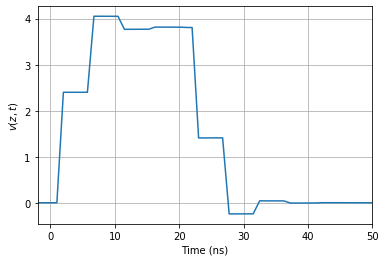

In [5]:
t = np.linspace(-2,100,10001)
v_z = np.zeros_like(t)
for k in range(10):
    v_z += v_zk(z_r,k,tau)
#print(enumerate(t))
#print(v_s2(t,0))
plt.plot(t,v_z)
plt.xlabel(r'Time (ns)')
plt.ylabel(r'$v(z,t)$')
plt.xlim([-2,50])
plt.grid()
